A) Pick a dataset, perform EDA and draw conclusions and finally build a Logistic Regression model. Define the following and evaluate your model by finding the following metrics:

a. Confusion matrix

b. Precision

c. Recall

d. F1-score,
e. Sensitivity

f. Specificity

g. Misclassification rate

h. ROC, AUROC

#### Libraries needed 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score

### Loading the dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 768 rows and 9 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The information was gathered as part of the Pima Indians Diabetes Database by the "National Institute of Diabetes and Digestive and Kidney Diseases." All of the patients are girls aged 21 and up who are of Pima Indian ancestry.

<u>Column descriptions</u>:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


The target variable is the outcome. 1 indicates that a person has diabetes where 0 means he/she does not have diabetes. 

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


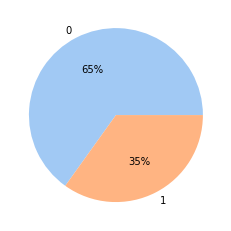

In [7]:
tab1 = df['Outcome'].value_counts(normalize = True)*100
print(tab1)
colors = sns.color_palette('pastel')[0:2]
plt.pie(tab1.values,labels = tab1.index,colors=colors,autopct='%.0f%%')
plt.show()

The above pie chart shows the distribution of Diabetes. It is very clear that most of the people have no diabetes (ie) 65%, remaining 35% of the people suffer from diabetes.

In [8]:
print("The minimum and maximum age in this dataset is: ",min(df['Age']),'years and',max(df['Age']),'years respectively')

The minimum and maximum age in this dataset is:  21 years and 81 years respectively


[Text(0.5, 1.0, 'Countplot for Age v/s Diabetes')]

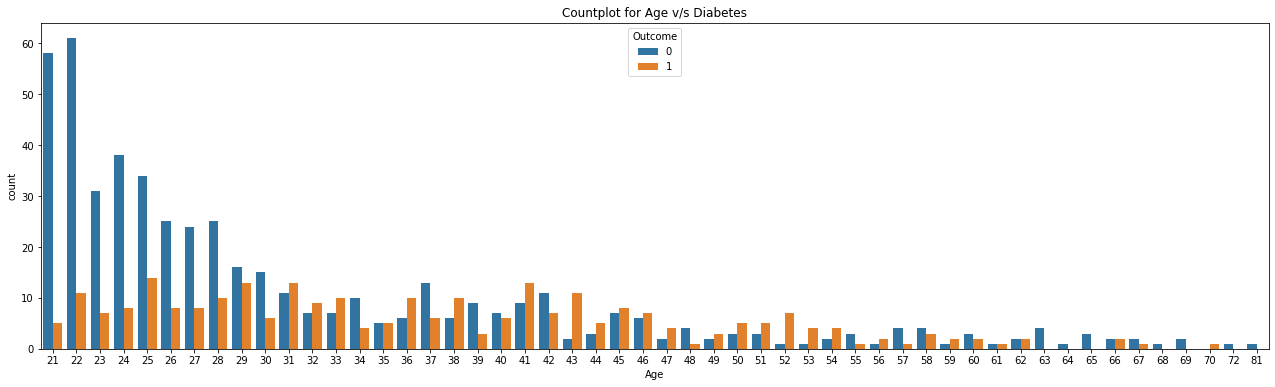

In [9]:
plt.figure(figsize=(22, 6))
sns.countplot(x="Age", hue="Outcome", data=df).set(title ="Countplot for Age v/s Diabetes")

From the above count plot we see that most of the young adults are not suffering from this disease. Most of the people of in their late 20s or early 30s are suffering from diabetes. 

The dataset has no missing values but certain variables like Glucose, Blood Pressure,Skin Thickness, Insulin, BMI have 0 values. This is actually wrong because these variables can't have zero values. So these variables have to be replaced by np.NaN

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

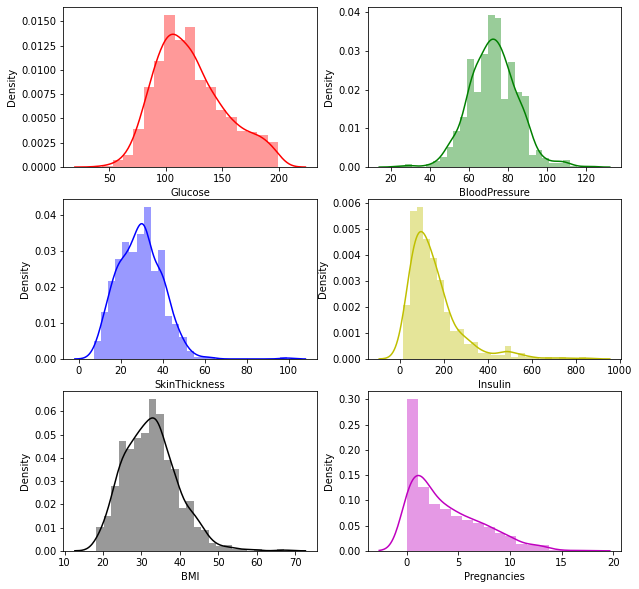

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))
Glucose= df['Glucose'].dropna()
sns.distplot(Glucose,color='r',ax=ax[0][0])

BloodPressure = df['BloodPressure'].dropna()
sns.distplot(BloodPressure,color='g',ax=ax[0][1])

SkinThickness = df['SkinThickness'].dropna()
sns.distplot(SkinThickness,color='b',ax=ax[1][0])

Insulin= df['Insulin'].dropna()
sns.distplot(Insulin,color='y',ax=ax[1][1])

BMI= df['BMI'].dropna()
sns.distplot(BMI,color='k',ax=ax[2][0])

Pregnancies = df['Pregnancies']
sns.distplot(Pregnancies,color='m',ax=ax[2][1])

<AxesSubplot:xlabel='BMI'>

<Figure size 1584x1296 with 0 Axes>

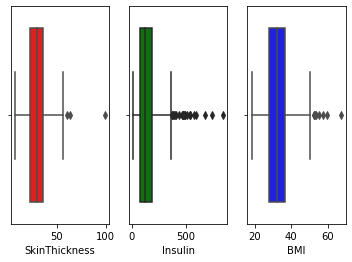

In [12]:
plt.figure(figsize=(22, 18))
f, axes = plt.subplots(1, 3)
sns.boxplot(x=df["SkinThickness"],color='r',ax=axes[0])
sns.boxplot(x=df["Insulin"],color='g',ax=axes[1])
sns.boxplot(x=df["BMI"],color='b',ax=axes[2])

So now we see that these have null values. To deal with these missing values we can do imputation (ie) replacing the missing values with their mean, median or mode. However the frequently used method is the imputation with mean. 

The above the plots gives us an idea how to do imputation (ie)
* First two plots - Glucose and BP has a bell shapped curve ==> replace np.Nan with mean. (Mean = Median and Mode are equal)
* We don't need to do anything for Pregnancies as there is no null value. 
* The plots for SkinThickness , Insulin and BMI shows a +vely skewed distribution. This also has outliers so it is better to replace the Nan values by their median instead of mean.

In [13]:
df["Glucose"].fillna(df["Glucose"].mean(),inplace=True) 
df["BloodPressure"].fillna(df["BloodPressure"].mean(),inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].median(),inplace=True) 
df["Insulin"].fillna(df["Insulin"].median(),inplace=True)
df["BMI"].fillna(df["BMI"].median(),inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

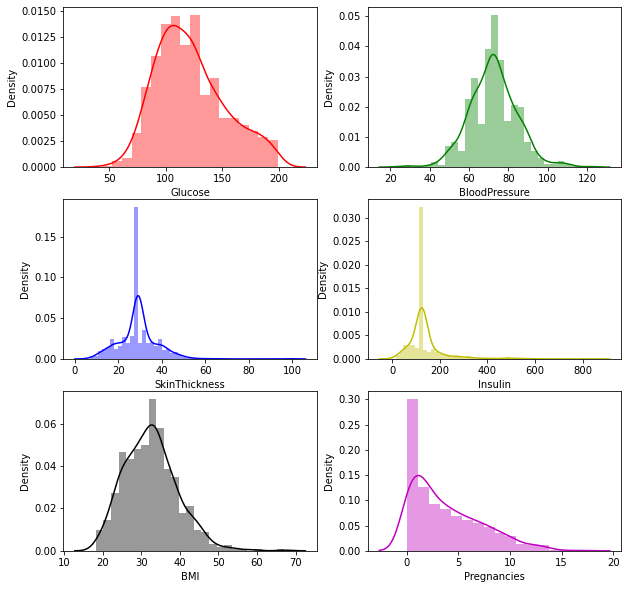

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))
Glucose= df['Glucose'].dropna()
sns.distplot(Glucose,color='r',ax=ax[0][0])

BloodPressure = df['BloodPressure'].dropna()
sns.distplot(BloodPressure,color='g',ax=ax[0][1])

SkinThickness = df['SkinThickness'].dropna()
sns.distplot(SkinThickness,color='b',ax=ax[1][0])

Insulin= df['Insulin'].dropna()
sns.distplot(Insulin,color='y',ax=ax[1][1])

BMI= df['BMI'].dropna()
sns.distplot(BMI,color='k',ax=ax[2][0])

Pregnancies = df['Pregnancies']
sns.distplot(Pregnancies,color='m',ax=ax[2][1])

<AxesSubplot:>

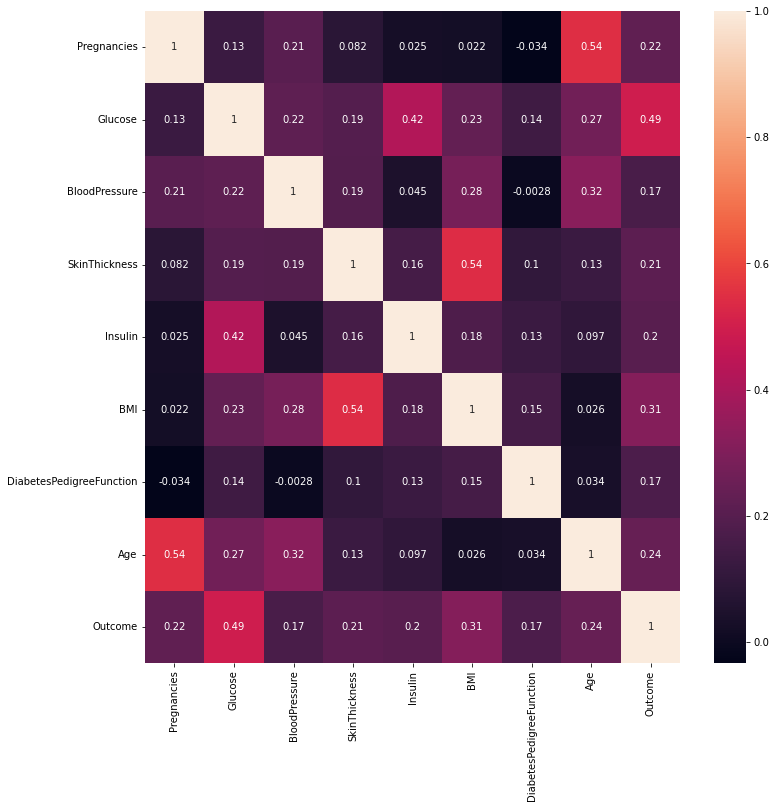

In [16]:
# correlation
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot =True)

In [17]:
print("\t \t \t Correlation with variable Outcome \t \t \t")
print("\t \t \t ---------------------------------\t \t \t")
df.corrwith(df['Outcome'],axis = 0).sort_values(ascending=False)

	 	 	 Correlation with variable Outcome 	 	 	
	 	 	 ---------------------------------	 	 	


Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
dtype: float64

* Correlation is a statistical method to understand the association between two variables. The value of correlation can varry from -1 to 1 (ie) -1 <= r<= 1

* We see that there are no variables with very high positve or negative correlation. Few variables have correlation that's higher than 0.5, those variables are:
   
     * Pregnancies and Age: Pregnancy rates might rise with age and then decline at a particular age.
     * Glucose and Outcome : A higher glucose level indicates a greater chance of being diagnosed with diabetes.
     * Skin Thickness and BMI : The higher the BMI, the fatter the individual.
  
* Insuline helps to regulate the body sugar level. It controls the amount of glucose in your bloodstream at any given moment. We see that there exist a positive correlation between Glucose and Outcome , this implies there should exist a positive correlation between Insuline and glucose because as the glucose level increases we need more Insulin. This is also shown in the above heatmap. 

* We have also listed down the correlation of between Outcome and other independent variables. We see that there is strong positive association between Glucose and Outcome. After Glucose the most correlated ones are BMI and Age.

<u>Logistic Regression</u>



In [18]:
# dependent and independent variables:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# Splitting the data so 10% is for testing

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

C:\Users\gayat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [23]:
print('intercept ', model.intercept_[0])

intercept  -7.1227434915125745


In [24]:
print('classes', model.classes_)
pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X.columns)

classes [0 1]


,coeff
Pregnancies,0.102370
Glucose,0.032333
BloodPressure,-0.033532
SkinThickness,-0.013146
Insulin,0.000150
BMI,0.106529
DiabetesPedigreeFunction,1.238049
Age,0.022730


In [25]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7619047619047619


a) **<u> Confusion Matrix</u>**   A confusion matrix is a table that shows how well a classification model (or "classifier") performs on a set of test data for which the true values are known. When comparing predicted and actual values, four different
columns are produced: true positive (TP), false positive (FP), false negative (FN) and true negative (TN).

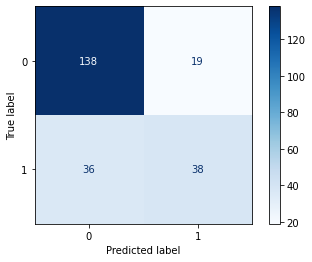

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)

From the above diagram, we can see that:

True Negative (TN) = 138 

False Positives (FP) = 19

False Negatives (FN) = 36

True Positives (FN) = 38


The performance of our model cannot be determined simply by looking at the matrix. So we go for checking the accuracy. The accuracy is used to determine the percentage of values that are correctly categorised. It indicates how frequently our classifier is correct. It's the total of all true values divided by the total of all true values.

b) **<u>Precision </u>**  The ratio of the total number of successfully classified positive classes divided by the total number of anticipated positive classes is known as precision. Or, out of all the positive predictive classes, how much did we get right? The level of precision should be high.

$$ Precision = \frac{TP}{TP+FP}$$


c) **<u>Recall </u>** It's used to figure out how well the model can predict positive values. "How frequently does the model correctly forecast positive values?" It's the total number of genuine positives divided by the total number of true positives.


d) **<u>F1 Score </u>** It's the harmonic mean of the two variables Recall and Precision. It's useful when you need to account for both precision and recall.

In [33]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

Accuracy: 0.805
Precision: 0.720
Recall: 0.692
F1 Score: 0.706


e) **<u>Sensitivity</u>**  (also called the true positive rate, or the recall in some fields) measures the proportion of actual positives which are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition), and is complementary to the false negative rate. Sensitivity= true positives/(true positive + false negative)


f) **<u>Specificity</u>** (also called the true negative rate) measures the proportion of negatives which are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition), and is complementary to the false positive rate. Specificity=true negatives/(true negative + false positives)

g) **<u>Misclassification rate</u>** is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.

h) **<u>ROC curve</u>** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
   * True Positive Rate
   * False Positive Rate
   

i) **<u>AUC</u>** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [35]:
print("Misclassification rate: ",np.mean(y_predict != y_test)*100)

Misclassification rate:  19.480519480519483


ROC curve


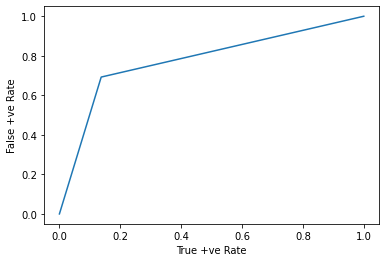

In [37]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_predict)

print("ROC curve")
plt.plot(fpr,tpr)
plt.xlabel("True +ve Rate")
plt.ylabel("False +ve Rate")
plt.show()

In [41]:
auc = metrics.roc_auc_score(y_test,y_predict)
print(auc)

0.7775263951734541


The area under the curve is 77.75% which mean the model is only 77.75% accurate 

### Reference



* Dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
* https://seaborn.pydata.org/tutorial.html#
* https://medium.com/analytics-vidhya/how-to-interpret-the-logistic-regression-model-with-python-2bacfb50e223
* https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/
* https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb
* https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
* https://www.statology.org/misclassification-rate/#:~:text=In%20machine%20learning%2C%20misclassification%20rate,%23%20incorrect%20predictions%20%2F%20%23%20total%20predictions

----